# Predicting Eye-State Based on EEG Data #
### Traditional Classification Neural Networks vs convolutional Neural Networks ###

*by Anthony Feudale, October 27, 2021*

## Introduction

Arguably one of the most exciting aspects of machine learning is its potential use for taking over certain types of cognitive work. Neural networks have made highly cognitive tasks, such as identifying objects in images, computational tasks as opposed to tasks which previously only humans could do. The accuracy and speed of such methods has proven to be game changing in some cases.</br>

A large part of what people do on a day-to-day basis in today's economy is cognitive work. While machine learning is highly limited in its scope (machine learning algorithms can only handle narrowly constrained tasks) it can serve to amplify the amount of work people are able to accomplish. No potential usage of machine learning better highlights this then Brain-Computer Interfaces or BCIs. Currently the ability of people to work with machines is mediated through devices like keyboards, mice, and touchscreens. All of these rely on direct physical manipulation to interface with a computer. Not everybody has full use of their limbs and these people have significant difficulty in using computers. New technologies like speech-to-text powered by machine learning have made large gains in ameliorating this problem. Additionally, traditional computer interfaces limit the speed with which people can interact with their devices. You can code or write only as fast as you can type, which can be limitation. Additionally, increasing the speed with which we interface with computers could serve to spark a quantum leap in humanity's productive capacity similar to the explosion in human knowledge brought about by the proliferation of knowledge via the printing press or the Internet [T. Urban, 2017]. Direct Brain-Computer Interfaces could help close this speed gap, and light the match for another such explosion.</br>

One Potential Avenue for BCIs is the EEG or Electroencephalogram [Johns Hopkins, 2021]. Via electrical sensors placed on the scalp this device senses changes in electrical impulses coming from the brain. Unfortunately, such signals are quite noisy and can be hard to interpret. This is where machine learning comes in. Using machine learning techniques it is possible to utilize EEG signals to detect when a user wants to do a particular action. For example, closing one's eyes, and the resulting changes in EEG activity, could signal that a user wants to "click" as if they were clicking the mouse button on a physical mouse. </br>

I found this idea intriguing and so decided to investigate it as part of my final project. I looked through various EEG data sets. A fair number of such sets exist. Many deal with motor imagery, emotion recognition, various potentials, and movement [Meagmohit, 2020]. After reviewing several data sets I eventually settled on one from the UCI Machine Learning Repository regarding eye-state [O. Roesler, 2013]. I did so because I could envision eye-state being used as an early means of interfacing with a computer and because the data was well curated for the learning task I had planned. I utilized both a traditional classification neural network as well as a convolutional neural network to attempt to determine eye-state from this EEG data. I utilized PyTorch to do so [A. Paszke, S. Gross, S. Chantala, and G. Chanan, 2021].

## Methods

The dataset I used is from the UCI Machine Learning Repository, and is in regard to eye-state (open or closed) [O. Roesler, 2013]. It is one unbroken time series. 14 EEG channels were captured over the course of 117 seconds for a total of 14,980 captured instances. For each instance, eye-state was captured via a camera and later manually added to the data set as  a 15th column where '0' indicates the eye-open state and 1' indicates the eye-closed state. The data file is in .arff format.</br>

I utilized PyTorch to train a model to predict eye-state based on the 14 EEG channels. I utilized both a traditional classification neural network And a convolutional neural network (CNN). I varied things like layer structure, learning rates, methods, optimization function, and training epochs to try and find an optimal network.

#### Methods: Classification Neural Network ####

My first step was to create two unique classes derived from PyTorch classes. I created a FinalProjectEEGDataset class, to handle the data, which was a child of the PyTorch Dataset class. I also created a NeuralNetwork class which was a child of the PyTorch nn.Module class, to serve as the model class. I wrote this class so that I could easily vary my model structure to change the numbers of inputs, number of hidden units per layer, number of outputs, and the activation function (relu, tanh, softplus, or sigmoid). I created some dummy data in the same shape as my real data with a much simpler pattern and was successfully able to train my model using this dummy data, showing that I had all the plumbing properly installed. </br>

I began my real modeling in earnest by trying to train my classification neural network using the base data without any cleaning. I simply split the original file into a training, validation, and test set with an 80/10/10 split, utilizing a random shuffle that did not preserve temporal ordering. After this I went back to the original data, and removed some outliers. I gained some insight from the work of T. Wang, S.-U. Guan, K. L. Man, and T. O. Ting and examined channel metadata (see below) [T. Wang, S.-U. Guan, K. L. Man, and T. O. Ting, 2014].</br>

The differences between various channel metadata values in the eye-open versus eye-closed date tended to be very small. They did seem to be present though. Given this I thought it would be interesting to add these values as inputs to the neural network. I thought adding these as a feature might give the neural network some information that would make it easier to identify trends between the states. I added the mean and standard deviation for the data as a whole as one of the data points for each sample. To avoid passing information from validate or test into train I first split up the data into train, validate, and test sets. I decided to preserve the temporal ordering when splitting up the data. For each of these new datasets I then calculated the overall mean and standard deviation for each channel and added those as column data in each dataset.</br>

I then tried lumping the data into chunks of ordered time. I thought it might be useful to lump the data in this manner so that the machine learning model could get input that was collected over a greater period of time and would hopefully be able to use this to make better predictions.  I lumped the data such that each chunk only contained data for eyes-open or eyes-closed states. I discard ambiguous chunks, and removed outliers. The chunks were 10 sample sizes in length and were ordered.</br>

Finally, inspired by work by K. Sabancı and M. Köklü, I utilized normalized and lumped data [K. Sabancı and M. Köklü, 2015]. I first removed outliers, then lumped the data, and then split the data into a training, validation, and test set with an 80/10/10 split, and then normalized each segment to ensure that I wasn't introducing future information into my validate and test sets. While each chunk retained its original temporal ordering, I utilized a random shuffle on the chunks, to ensure an even distribution of eye states in each set.</br>

For each of these data sets I varied a number of parameters including: number of hidden units per layer, the activation function (relu, tanh, softplus or sigmoid), the learning rate, and number of training epochs. These were varied for each of the optimization functions (Adam or SGD). I utilized Cross Entropy Loss as my loss function. I evaluated the accuracy of each of the models I trained using the validation set. I held the test set in reserve for the final model I chose as the most accurate on the validation set.</br>

A jupyter notebook detailing the entirety of the steps I took in training my standard classification neural network is included with this report in a separate file named Feudale_Final_Project.ipynb.

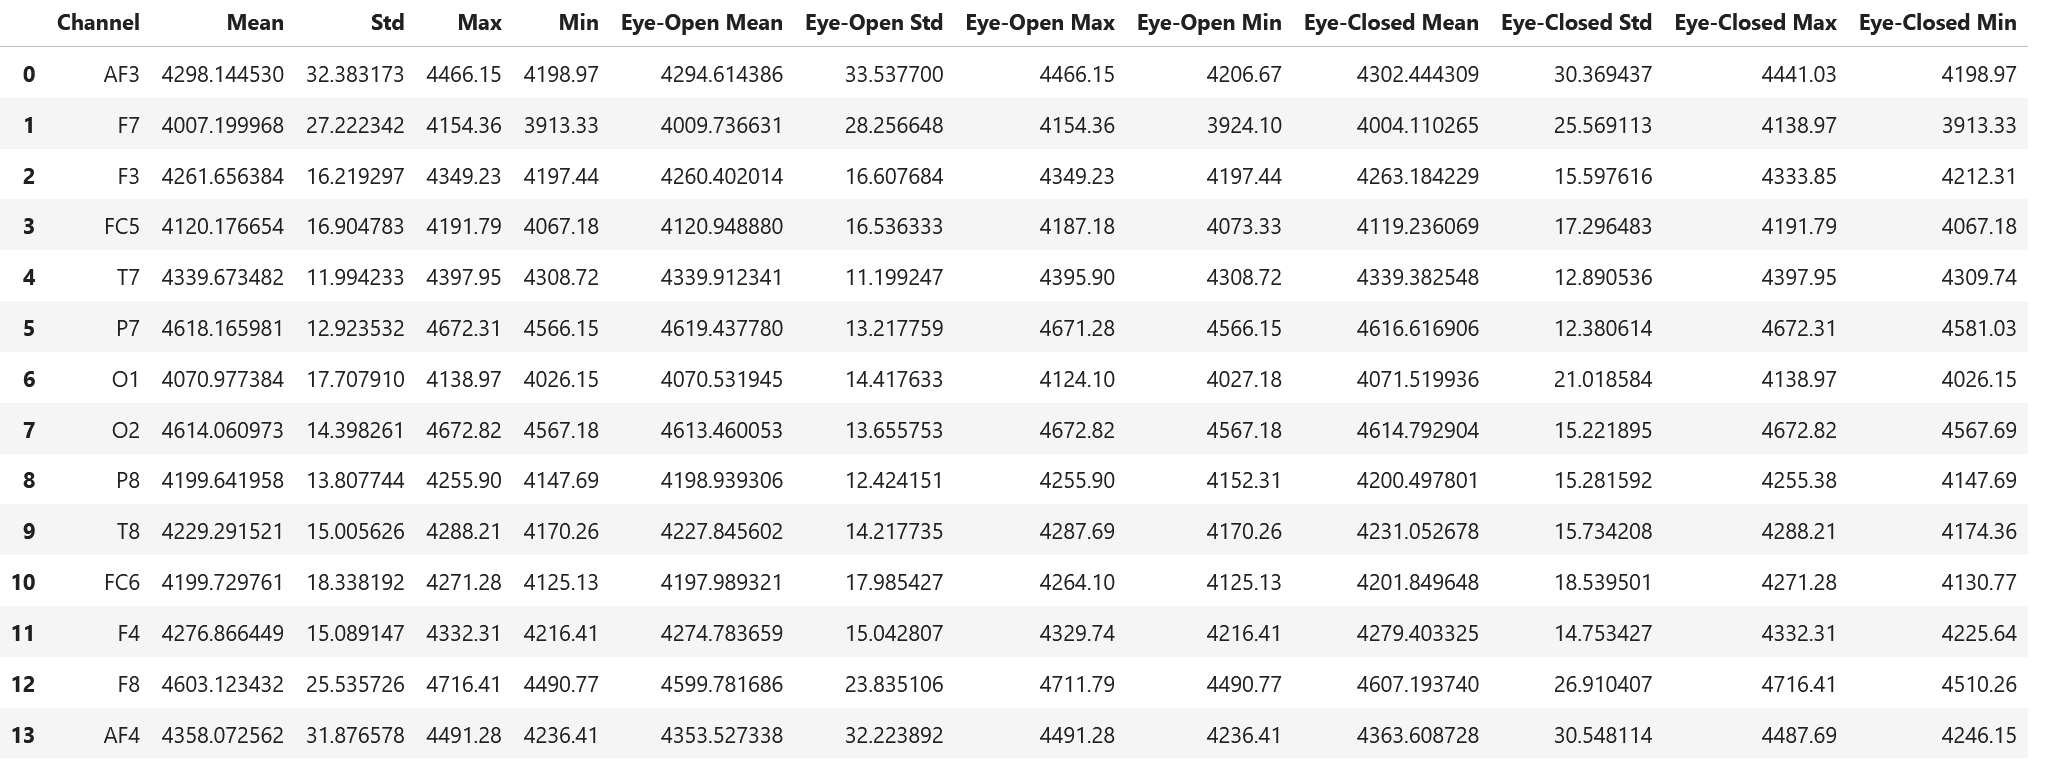</br>
Figure 1: Channel Metadata from Eye State Data 

#### Methods: Convolutional Neural Network ####

My first step for using a CNN was to create a unique CNN class derived from the PyTorch nn.Module class to serve as the model class. I wrote this class so that I could easily vary my model structure to change the number of channels, numbers of inputs, number of hidden units per convolutional layer, number of hidden units per fully connected layer, number of outputs, kernel size per convolutional layer, stride per convolutional layer, and the activation function (relu or tanh).  I used the same FinalProjectEEGDataset class from before, to handle the data.</br>

I used a much simpler approach when it came to data for the CNN. I had already done quite a bit of experimentation using the standard neural network  and had found a data organization that worked well. I utilized the normalized and time lumped data I had constructed as part of my original neural training. I then convolved over the data within each 10 sample chunk. I also created some dummy data with a simple repeating pattern in the same shape as this lumped data in order to test that my CNN was properly setup.</br>

For each of these data sets I varied a number of parameters including: number of hidden units per convolutional layer, number of hidden units per fully connected layer, kernel size per convolutional layer, stride per convolutional layer, the activation function (relu or tanh), the learning rate, and the number of training epochs. These were varied for each of the optimization functions (Adam or SGD). I utilized Cross Entropy Loss as my loss function. I used the work of F. William and F. Zhu on CNN modeling of eye state as a guide for some potential parameter settings to try [F. William and F. Zhu, 2021]. I evaluated the accuracy of each of the models I trained using the validation set. I held the test set in reserve for the final model I chose as the most accurate on the validation set.</br>

A jupyter notebook detailing the entirety of the steps I took in training my standard CNN is included with this report in a separate file named Feudale_Final_Project_CNN.ipynb.

## Results

#### Results: Classification Neural Network ####

After thoroughly exploring numerous parameters I finally settled on using a model with the following parameters: I had 3 hidden layers with 20 units. 10 units, and 10 units respectively. I utilized a learning rate of 0.005. I used Adam as the optimizer function. I used softplus as the activation function. I utilized Cross Entropy Loss. I trained this model for 1000 epochs.

The results I achieved were pretty good. Overall on the test data I had 90.8% accuracy. When I broke the results out in a confusion matrix as open versus closed my model was correctly identifying cases of open eyes 90.6% of the time and closed eyes 91.1% of the time. This was a fairly even split and showed that the model was not using a strategy biased in favor of one state versus the other. I was fairly satisfied with these results at classifying using a standard classification neural network. I felt I might be able to do even better using a CNN.

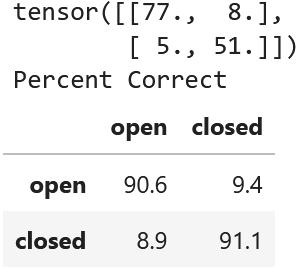</br>
Figure 2: Confusion Matrix Breakdown of Final Test Set Accuracy for Standard Classification Neural Network

#### Results: Convolutional Neural Network ####

After thoroughly exploring numerous parameters I finally settled on using a model with the following parameters: I had two convolutional hidden layers with 20 units each. Each convolution layer used a kernel 10 units in length with a stride length of one and a padding size of 0. I also had two fully connected layers with 20 and 15 layers respectively. These came after the convolutional layers in order. I utilized a learning rate of 0.05. I used SGD as the optimizer function with a momentum of 0.9. I utilized Cross Entropy Loss. I trained this model for 1000 epochs.

This model had produced the highest validation accuracy of any model I trained. I evaluated its performance on the train, validation, and test data sets with 100%, 95.0%, and 97.2% accuracies achieved on each data set respectively. When I broke the results out in a confusion matrix as open versus closed my model was correctly identifying cases of open eyes 96.5% of the time and closed eyes 98.2% of the time. This was a fairly even split and showed that the model was not using a strategy biased in favor of one State versus the other. Overall, I was very satisfied with these results.

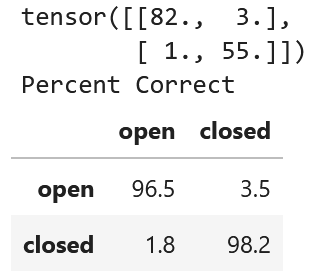</br>
Figure 3: Confusion Matrix Breakdown of Final Test Set Accuracy for CNN

## Conclusions

I expect that I will learn a great deal about the intricacies in setting up networks. I expect I will also get an object lesson in the problems that often arise when trying to get a neural network to learn from a noisy data set. I will be interested to see if the relatively small size of my data set has a deleterious impact on each neural network's ability to learn. I hope I learn that 15,000 samples can be enough, but we will see.</br>

While many aspects of this project will be challenging, I expect the most challenging piece will be identifying the parameters which best allow the neural networks to correctly classify eye-state. I expect this to take many attempts and involve a lot of trial and error. Second place in terms of challenge will likely be getting the neural network set up to run at all initially. This will probably take some time, but it will likely be easier due to the plethora of material and tutorials on PyTorch available.

### References

* [T. Urban, 2017] T. Urban, “Neuralink and the brain's magical future,” Wait But Why, 20-Apr-2017. [Online]. Available: https://waitbutwhy.com/2017/04/neuralink.html. [Accessed: 29-Oct-2021]. 
* [Johns Hopkins, 2021] Johns Hopkins, “Electroencephalogram (EEG),” Johns Hopkins Medicine, 2021. [Online]. Available: https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/electroencephalogram-eeg. [Accessed: 29-Oct-2021]. 
* [Meagmohit, 2020] Meagmohit, “Meagmohit/EEG-datasets: A list of all public EEG-datasets,” GitHub, 23-Nov-2020. [Online]. Available: https://github.com/meagmohit/EEG-Datasets. [Accessed: 29-Oct-2021]. 
* [O. Roesler, 2013] O. Roesler, “EEG eye-state Data Set,” UCI Machine Learning Repository: Eeg eye-state Data set, 10-Jun-2013. [Online]. Available: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State. [Accessed: 29-Oct-2021]. 
* [A. Paszke, S. Gross, S. Chantala, and G. Chanan, 2021] A. Paszke, S. Gross, S. Chantala, and G. Chanan, “Pytorch/Pytorch: Tensors and dynamic neural networks in python with strong GPU acceleration,” GitHub, 29-Oct-2021. [Online]. Available: https://github.com/pytorch/pytorch. [Accessed: 29-Oct-2021]. 
* T. Wang, S.-U. Guan, K. L. Man, and T. O. Ting, “Eeg Eye State identification using incremental attribute learning with time-series classification,” Mathematical Problems in Engineering, vol. 2014, pp. 1–9, Apr. 2014. doi: 10.1155/2014/365101. [Online]. Available: https://www.researchgate.net/publication/261995555_EEG_Eye_State_Identification_Using_Incremental_Attribute_Learning_with_Time-Series_Classification?enrichId=rgreq-1be1a60994bd83f3ebf5f7ef05cf36e0-XXX&enrichSource=Y292ZXJQYWdlOzI2MTk5NTU1NTtBUzoxMDE2MTQxNTczMDM4MjNAMTQwMTIzODExMTc2Mw%3D%3D&el=1_x_3&_esc=publicationCoverPdf. [Accessed: 21-Nov-2021].  
* K. Sabancı and M. Köklü, “The classification of Eye State by using KNN and MLP classification models according to the EEG signals,” International Journal of Intelligent Systems and Applications in Engineering, vol. 3, no. 4, p. 127, 2015. doi: http://dx.doi.org/10.18201/ijisae.75836. [Online]. Available: https://www.researchgate.net/publication/289685013_The_Classification_of_Eye_State_by_Using_kNN_and_MLP_Classification_Models_According_to_the_EEG_Signals. [Accessed: 21-Nov-2021].
* F. William and F. Zhu, “CNN models for eye state classification using EEG with temporal ordering,” Proceedings of the 12th ACM Conference on Bioinformatics, Computational Biology, and Health Informatics, pp. 1–8, Aug. 2021. doi: https://doi.org/10.1145/3459930.3471160. [Online]. Available: https://dl.acm.org/doi/abs/10.1145/3459930.3471160. [Accessed: 21-Nov-2021]. 

In [3]:
import io
import nbformat
import glob

nbfile = glob.glob("Feudale_Final_Project_Report.ipynb")
if len(nbfile) > 1:
    print("More than one ipynb file. Using the first one.  nbfile=", nbfile)
with io.open(nbfile[0], "r", encoding="utf-8") as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print("Word count for file", nbfile[0], "is", word_count)

Word count for file Feudale_Final_Project_Report.ipynb is 2562
